In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/home/hnguyen/cloth_smoothing/equiRL/data/equi/video/demo.csv')
data.describe()

,Length,NUM_FLING
count,1000.000000,1000.000000
mean,107.559000,2.237000
std,31.158681,0.622269
min,39.000000,1.000000
25%,91.000000,2.000000
50%,100.000000,2.000000
75%,136.000000,3.000000
max,178.000000,3.000000


In [3]:
# load columns NPY_path
path = data['NPY_Path']
path

0      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
1      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
2      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
3      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
4      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
                             ...                        
995    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
996    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
997    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
998    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
999    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
Name: NPY_Path, Length: 1000, dtype: object

In [4]:
npy_data = np.load(path[0], allow_pickle=True)
npy_data

/home/hnguyen/miniconda3/envs/softgym/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[tensor([[[[216, 216, 216,  ..., 246, 246, 246],
                  [216, 216, 216,  ..., 246, 246, 246],
                  [216, 216, 216,  ..., 246, 246, 246],
                  ...,
                  [246, 246, 246,  ..., 216, 216, 216],
                  [246, 246, 246,  ..., 216, 216, 216],
                  [246, 246, 246,  ..., 216, 216, 216]],

                 [[213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  ...,
                  [243, 243, 243,  ..., 213, 213, 213],
                  [243, 243, 243,  ..., 213, 213, 213],
                  [243, 243, 243,  ..., 213, 213, 213]],

                 [[213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  ...,
                  [243, 243, 243,  ..., 213, 213, 213],
                  [243, 243, 24

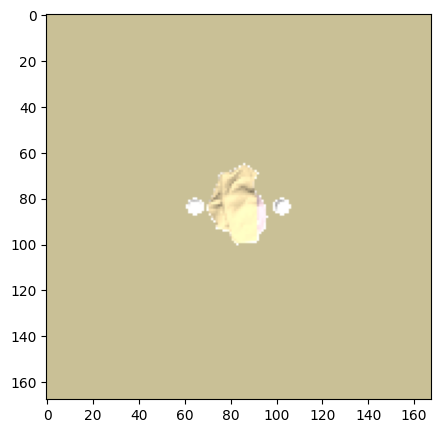

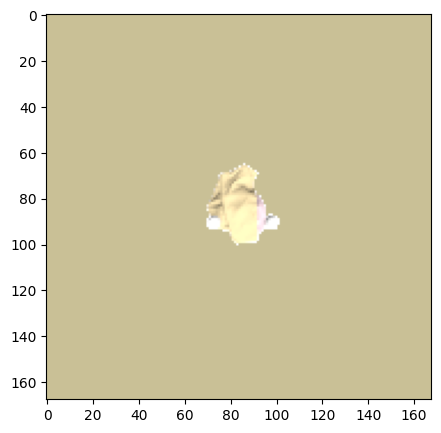

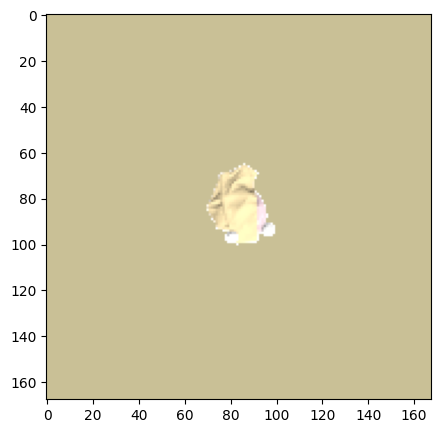

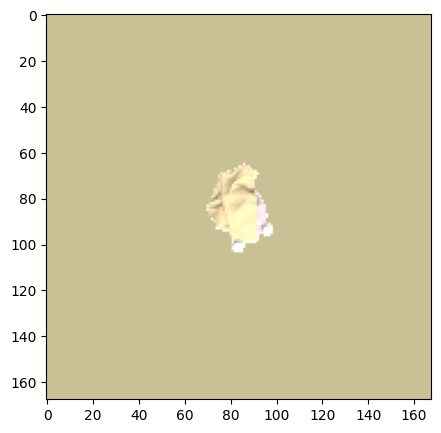

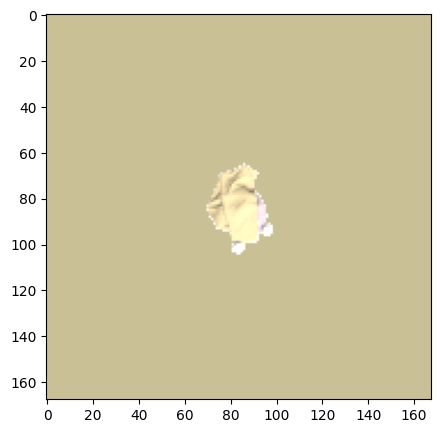

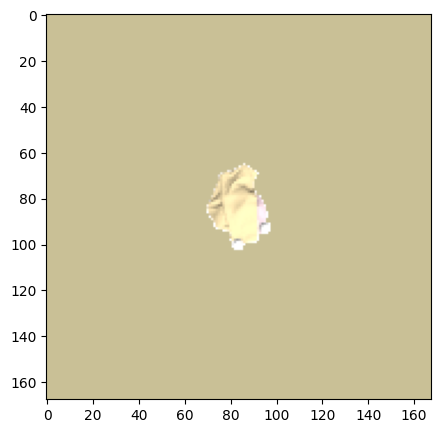

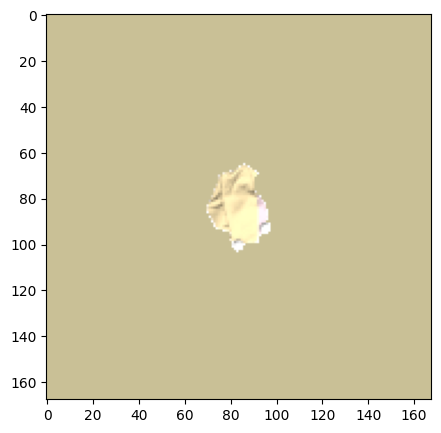

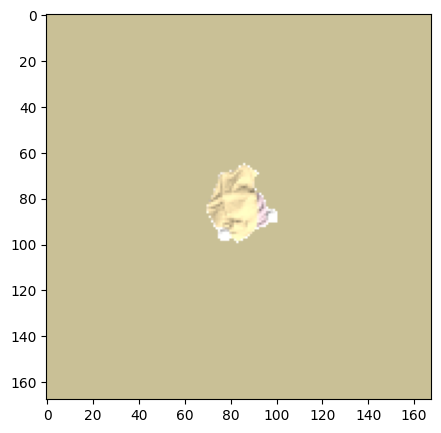

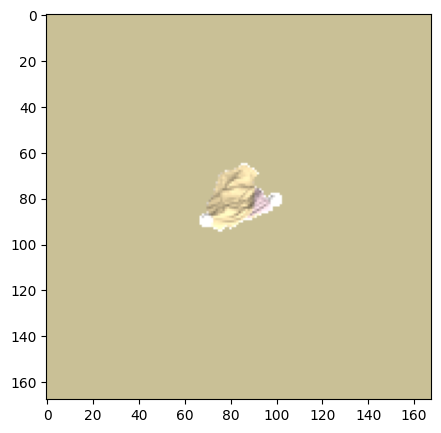

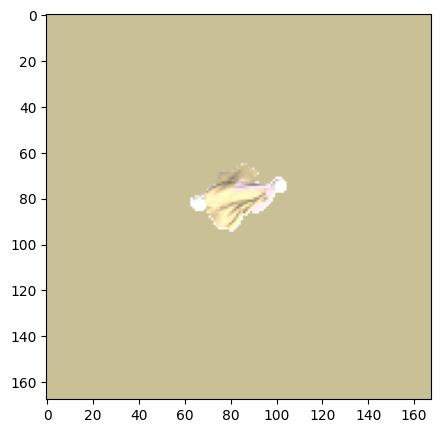

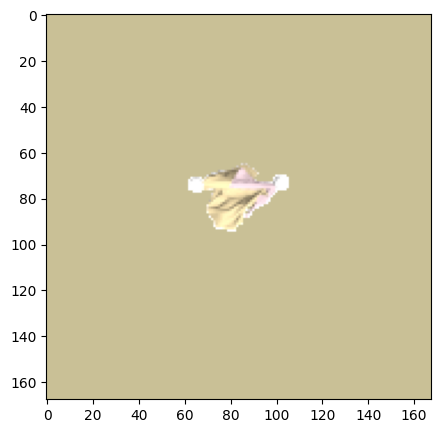

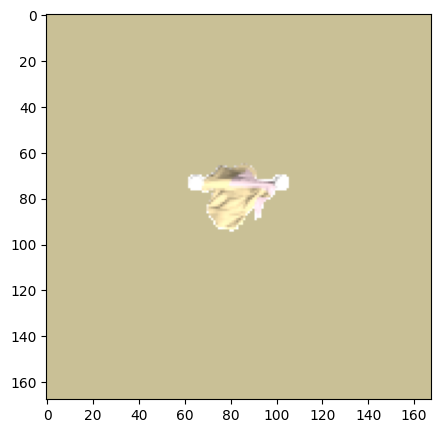

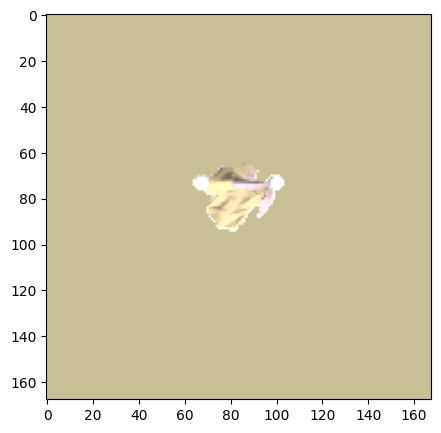

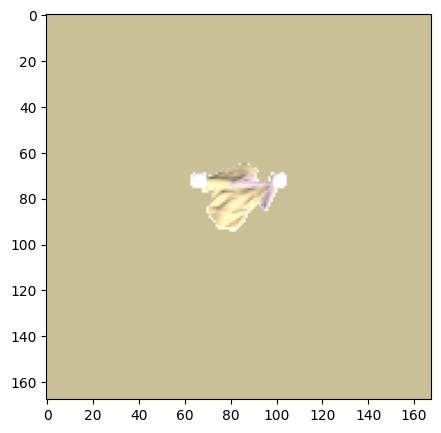

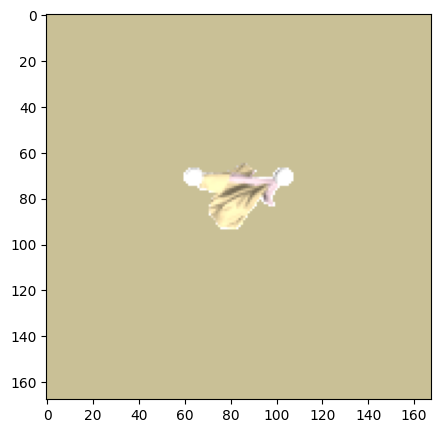

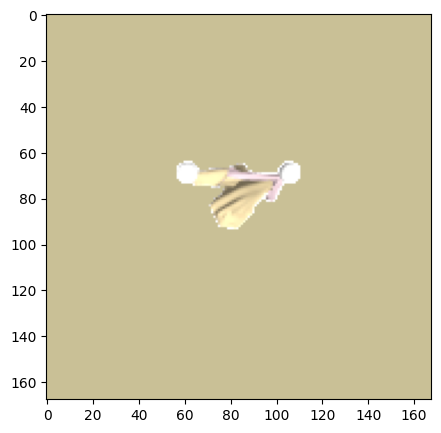

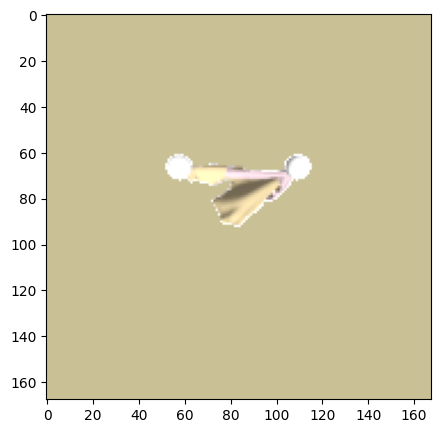

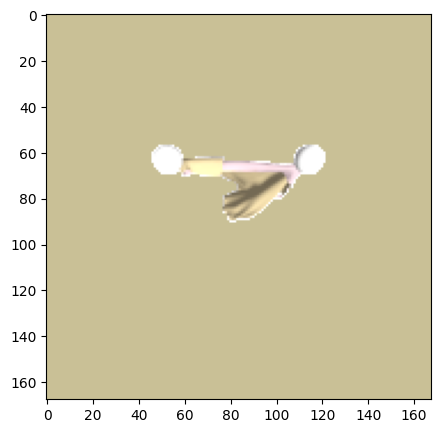

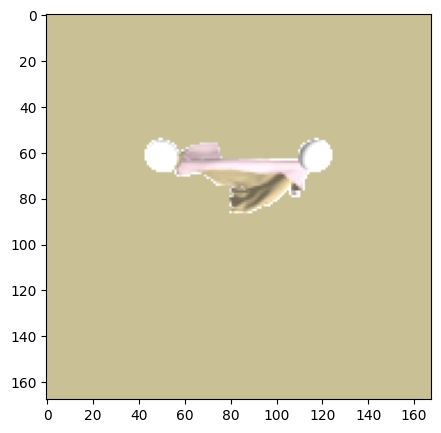

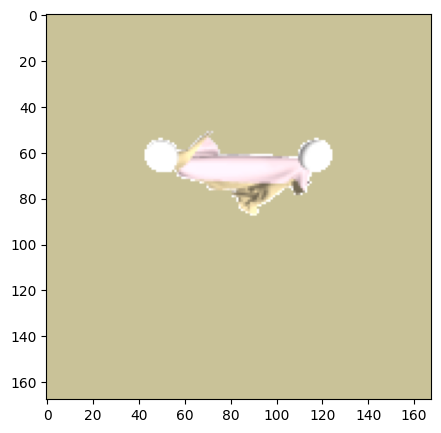

In [20]:
from torchvision import transforms
from byol import RandomGrayScaleRGBD, RandomColorJitterRGBD, RandomChangeBackgroundRGBD
import torch
from matplotlib import pyplot as plt
obses = []
for i in range(len(npy_data)):
    data = npy_data[i][0]
    obses.append(data)

obses = torch.stack(obses, dim=0)
obses = obses.view(-1, 4, 168, 168)

aug = transforms.Compose([
    RandomChangeBackgroundRGBD(p=0.5),
    RandomColorJitterRGBD(p=1.0),
    RandomGrayScaleRGBD(p=0.2),
])
aug_obses = aug(obses)

# obses_rgb = obses[:, :3, :, :]
# obses_depth = obses[:, 3:, :, :]
# mask = obses_depth >= 253
# mask = mask.squeeze(1)
# obses_rgb_masked = obses_rgb.clone()
# random_color = torch.rand(3)
# for i in range(3):
#     obses_rgb_masked[:, i, :, :][mask] = int(random_color[i] * 255)
# obses = torch.cat([obses_rgb_masked, obses_depth], dim=1)
# print(obses.shape)
for i in range(20):
    obs_rgb_masked = aug_obses[i, :3, :, :]
    plt.figure(figsize=(5, 5))
    plt.imshow(obs_rgb_masked.permute(1, 2, 0).numpy())

RuntimeError: The size of tensor a (512) must match the size of tensor b (2) at non-singleton dimension 1